<center>
<img src="FIFA-19-Background-1-768x401.jpg" />

## Aprendizaje No Supervisado 2020 DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
## Agrupamiento con el FIFA 2019 dataset
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Exploración de la Base](#2.-Exploración-de-la-base)
3. [Preparación de los datos](#3.-Preparación-de-los-datos)
4. [Clustering Visual](#3.-Exploratorio-Visual-para-Clustering)

## 1.-Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Exploración-de-la-base

**Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) (https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'.** 

In [3]:
df=pd.read_csv("players_20.csv")
df.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail(4)
# Me devuelve las últimas 'n' filas, en este caso 4, si 'n' es negativo me devuelve todas las filas excepto las n primeras

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,...,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,...,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,...,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,...,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [5]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print(df.columns[:77])
print(len(df.columns))

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_

La variable **'Overall'** se calcula usando otras variables de desempeño del jugador (skills_ratings).

La variable 'Overall' es discreta, así como las otras de desempeño según habilidad ('Crossing',
       'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100
       
Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'. 

**Realizamos el histograma de la variable "Overall" (Desempeño global)**

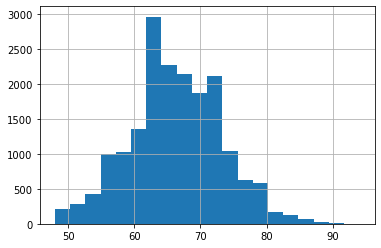

In [6]:
df['overall'].hist(bins = 20)

In [7]:
best_players_per_position=df.iloc[df.groupby(df['team_position'])['overall'].idxmax()][['team_position','short_name','overall']]
best_players_per_position

,team_position,short_name,overall
2,CAM,Neymar Jr,92
126,CB,S. de Vrij,84
21,CDM,Sergio Busquets,89
46,CF,K. Benzema,87
123,CM,Luis Alberto,84
3,GK,J. Oblak,91
306,LAM,Taison,82
51,LB,Jordi Alba,87
7,LCB,V. van Dijk,90
33,LCM,David Silva,88


In [8]:
pd.DataFrame(df.team_position.value_counts().sort_index())

,team_position
CAM,311
CB,100
CDM,181
CF,14
CM,76
GK,662
LAM,23
LB,560
LCB,660
LCM,411


In [9]:
club_avg_overall=df.groupby("club")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

,club,overall
226,FC Bayern München,81.304348
505,Real Madrid,80.121212
350,Juventus,80.060606
650,Uruguay,78.608696
224,FC Barcelona,78.363636
407,Mexico,78.000000
426,Netherlands,78.000000
166,Colombia,78.000000


## 2.-Preparación-de-los-datos

**Retiramos jugadores con bajo Desempeño global ("Overall"), reducimos el tamaño de la base**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [10]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning']

print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

33 variables numéricas de desempeño según habilidad


**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [11]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n=df_n.append(MachineGunDict,ignore_index=True)

In [12]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [13]:
df_skills.head(4)

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning
0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14
1,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14
2,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15
3,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90


In [14]:
# Verificamos que no hayan valores nulos en nuestras variables de skill
df_skills.isna().sum()

attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentality_positioning         0
mentality_vision              0
mentality_penalties           0
mentality_composure           0
defending_marking             0
defending_standing_tackle     0
defending_sliding_tackle      0
goalkeeping_diving            0
goalkeeping_handling          0
goalkeep

## 3.-Exploratorio-Visual-para-Clustering

**Visualizamos los datos de a dos variables numéricas**

**Consigna de trabajo en grupo: buscar agrupamiento de datos usando las variables en skill_ratings de a pares**

In [15]:
df_n.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023.0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32.0,1987-06-24,170.0,72.0,Argentina,FC Barcelona,94,94.0,95500000.0,565000.0,"RW, CF, ST",Left,5.0,4.0,4.0,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8.0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801.0,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34.0,1985-02-05,187.0,83.0,Portugal,Juventus,93,93.0,58500000.0,405000.0,"ST, LW",Right,5.0,4.0,5.0,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871.0,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27.0,1992-02-05,175.0,68.0,Brazil,Paris Saint-Germain,92,92.0,105500000.0,290000.0,"LW, CAM",Right,5.0,5.0,5.0,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11.0,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389.0,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26.0,1993-01-07,188.0,87.0,Slovenia,Atlético Madrid,91,93.0,77500000.0,125000.0,GK,Right,3.0,3.0,1.0,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277.0,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28.0,1991-01-07,175.0,74.0,Belgium,Real Madrid,91,91.0,90000000.0,470000.0,"LW, CF",Right,4.0,4.0,4.0,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN

In [16]:
df_n.drop(skills_ratings, axis=1).columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'goalkeeping_reflexes', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb'],
      dtype='object')

In [17]:
df_n.drop(skills_ratings, axis=1).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023.0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32.0,1987-06-24,170.0,72.0,Argentina,FC Barcelona,94,94.0,95500000.0,565000.0,"RW, CF, ST",Left,5.0,4.0,4.0,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",8.0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801.0,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34.0,1985-02-05,187.0,83.0,Portugal,Juventus,93,93.0,58500000.0,405000.0,"ST, LW",Right,5.0,4.0,5.0,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",11.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871.0,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27.0,1992-02-05,175.0,68.0,Brazil,Paris Saint-Germain,92,92.0,105500000.0,290000.0,"LW, CAM",Right,5.0,5.0,5.0,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",11.0,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389.0,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26.0,1993-01-07,188.0,87.0,Slovenia,Atlético Madrid,91,93.0,77500000.0,125000.0,GK,Right,3.0,3.0,1.0,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277.0,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28.0,1991-01-07,175.0,74.0,Belgium,Real Madrid,91,91.0,90000000.0,470000.0,"LW, CF",Right,4.0,4.0,4.0,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",8.0,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [18]:
df_n[skills_ratings].describe()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning
count,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000
mean,58.262771,54.057179,59.449022,67.698760,51.823839,64.320790,57.134959,51.144839,61.889847,67.685306,67.452596,67.633172,67.712214,71.824679,65.586294,67.830986,68.633593,69.149674,69.867774,56.995796,64.027328,54.128232,58.877234,62.899727,55.392684,69.299138,53.779062,53.898676,51.014085,16.657347,16.443347,16.251839,16.569687
std,19.057687,20.483703,18.241367,13.742444,19.371476,18.872155,19.546689,19.273338,14.419714,16.130121,14.561249,14.222689,14.253701,5.584465,14.534318,11.524375,11.849742,14.882321,11.546919,19.788059,17.007064,22.016307,20.533539,13.361799,16.532943,8.903975,21.563590,23.421518,23.560830,19.244976,18.344544,17.700173,18.832135
min,6.000000,5.000000,7.000000,11.000000,5.000000,7.000000,6.000000,4.000000,9.000000,5.000000,15.000000,16.000000,14.000000,54.000000,20.000000,15.000000,29.000000,13.000000,26.000000,5.000000,11.000000,7.000000,3.000000,10.000000,9.000000,17.000000,7.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000
25%,49.000000,40.000000,52.000000,66.000000,38.000000,60.000000,46.000000,37.000000,57.000000,66.000000,59.000000,60.000000,60.000000,68.000000,57.000000,60.000000,62.000000,65.000000,63.000000,47.000000,55.000000,33.000000,50.000000,56.000000,45.000000,65.000000,35.000000,32.000000,27.000000,8.000000,8.000000,8.000000,8.000000
50%,65.000000,60.000000,64.000000,71.000000,56.000000,71.000000,63.000000,54.000000,65.000000,72.000000,69.000000,70.000000,70.000000,72.000000,68.000000,70.000000,70.000000,72.000000,71.000000,64.000000,69.000000,64.000000,67.000000,66.000000,59.000000,70.000000,62.000000,65.000000,61.000000,11.000000,11.000000,11.000000,11.000000
75%,72.000000,70.000000,72.000000,75.000000,67.000000,76.000000,72.000000,67.000000,72.000000,76.000000,78.000000,77.000000,77.000000,75.000000,76.000000,76.000000,77.000000,78.000000,78.000000,71.000000,76.000000,73.000000,73.000000,73.000000,68.000000,75.000000,72.000000,74.000000,72.000000,14.000000,14.000000,14.000000,14.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [19]:
# Agrupamos de acuerdo a la posición de los jugadores, y nos fijamos donde se ubican el %75 de los datos 
# de nuestras variables, que sería la mayoría de los datos.
df_n_playerp=df_n.groupby(by=['team_position'])[skills_ratings].quantile(.75)
df_n_playerp

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning
team_position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CAM,75.00,73.00,63.00,79.00,72.00,80.00,78.25,75.25,75.00,80.00,79.25,76.00,82.25,77.00,83.00,77.25,71.00,76.25,71.00,76.00,69.00,59.00,76.00,78.00,73.00,78.00,58.00,60.25,57.00,13.00,13.00,13.00,13.25
CB,53.75,43.00,78.00,73.25,47.25,64.00,52.25,51.50,71.25,69.50,64.00,69.00,63.00,77.25,61.75,68.00,82.25,72.25,85.00,58.50,81.00,79.25,50.25,63.00,51.50,75.00,80.25,80.50,78.00,12.00,12.00,14.00,14.00
CDM,71.00,63.75,68.00,79.00,64.00,74.00,74.00,74.00,78.00,77.75,68.00,67.00,72.75,76.00,74.75,78.00,76.75,85.00,78.00,73.75,82.00,78.00,68.00,75.75,68.00,77.75,76.00,77.00,74.00,14.00,13.00,13.75,13.75
CF,74.00,83.00,78.00,79.00,78.00,86.00,79.00,68.00,71.00,86.00,82.00,86.00,81.00,78.00,77.00,82.00,78.00,84.00,77.00,76.00,73.00,45.00,81.00,79.00,75.00,83.00,47.00,51.00,42.00,14.00,11.00,12.00,8.00
CM,73.50,64.75,62.00,80.00,71.50,75.75,74.75,75.00,79.00,78.75,75.00,69.75,80.50,76.75,76.00,77.00,70.00,80.75,75.50,72.75,81.50,75.00,67.75,76.75,70.75,78.75,70.75,75.00,70.00,14.75,14.00,13.00,13.50
GK,18.00,15.00,17.00,36.00,16.00,18.00,19.00,18.00,35.00,26.50,51.00,51.50,56.00,75.00,53.00,56.00,73.00,40.00,72.00,17.00,35.00,23.00,15.00,55.00,25.00,62.50,20.00,17.00,16.00,79.00,76.00,75.00,78.00
LAM,75.00,73.00,63.00,77.00,72.00,80.00,74.00,73.00,70.00,79.00,86.00,81.00,89.00,74.00,84.00,78.00,73.00,76.00,67.00,76.00,61.00,46.00,75.00,78.00,71.00,76.00,47.00,53.00,47.00,13.00,15.00,13.00,15.00
LB,78.00,58.00,68.00,75.00,58.00,75.00,75.00,66.25,70.25,76.00,82.00,83.00,78.00,75.00,78.00,75.00,77.00,85.00,73.00,67.25,76.00,75.00,70.00,69.00,61.00,74.00,75.00,77.00,76.00,13.00,13.00,13.00,13.00
LCB,59.00,43.00,77.00,71.00,45.00,62.00,57.00,50.25,69.00,67.00,66.00,69.00,64.00,74.00,63.00,67.00,81.25,75.00,85.00,52.25,81.00,78.00,51.00,58.00,55.00,73.00,77.00,79.00,77.00,13.00,14.00,13.00,13.00


In [20]:
len(df_n_playerp)

29

In [125]:
# Podríamos decir que obtuvimos 395 grupos

In [21]:
df_n_playerp.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning'],
      dtype='object')

In [22]:
# Planteamos un método de correlación que nos diga si están correlacionadas las variables
correlacion=df_n_playerp.corr()

In [33]:
# Seleccionamos aquellas variables que estén menos correlacionadas, de esta forma, en vez de formar una recta juntas,
# los datos representados por estas variables se encuentran lo más disperso posible
interesting_skill = correlacion['movement_balance']
interesting_skill= interesting_skill.abs().sort_values(ascending=True)
interesting_skill[1:6]

mentality_interceptions       0.030845
defending_marking             0.030867
defending_sliding_tackle      0.038686
movement_reactions            0.044272
attacking_heading_accuracy    0.126271
Name: movement_balance, dtype: float64

In [34]:
# Graficamos...

data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elejimos dos números entre 0 y  de n_skills-1

skill_1='movement_balance'
skill_2='mentality_interceptions'

#skill_1=skills_ratings[4]
#skill_2=skills_ratings[21]



graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'team_position'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'team_position'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
# En el gráfico anterior se puede ver el agrupamiento por "team position". Si bien se diferencian dos grandes grupos,
# se puede ver que se diferencian grupos pequeños también. 

Graficamos diferenciando los mejores jugadores y alguna característica de interés (Elegir)

Se puede ubicar un jugador con la siguiente linea de comando, por ejemplo, Leo Messi: 

In [36]:
#Gráfico 2

#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='L. Messi' 
recherche_joueur2=df_n["short_name"]=='Cristiano Ronaldo' # acá podemos elegir otro 


bool_crack=df_n["overall"] > 85
bool_elecc=df_n["club"]=='FC Barcelona' 
#bool_elecc=df_n["Position"]=='GK' #arqueros
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1='movement_balance'  #6
skill_2='mentality_interceptions'  #25


palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'team_position'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')#mode='markers+text'

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Messi',
                           text=df_n.loc[recherche_joueur,'team_position'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

joueur_recherche2 =go.Scatter(x=df_skills.loc[recherche_joueur2,skill_1], y=df_skills.loc[recherche_joueur2,skill_2],name='Ronaldo',
                           text=df_n.loc[recherche_joueur2,'team_position'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[0],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche,joueur_recherche2]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [27]:
set(df_n.team_position)

{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RES',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST',
 'SUB',
 nan}

**Identifiquemos algunos jugadores por nombre**

In [37]:
print(df_n.loc[0:43,"short_name"])

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3              J. Oblak
4             E. Hazard
5          K. De Bruyne
6         M. ter Stegen
7           V. van Dijk
8             L. Modrić
9              M. Salah
10            K. Mbappé
11         K. Koulibaly
12              H. Kane
13              Alisson
14               De Gea
15             N. Kanté
16         G. Chiellini
17            S. Agüero
18         Sergio Ramos
19            L. Suárez
20       R. Lewandowski
21      Sergio Busquets
22         A. Griezmann
23            P. Dybala
24             P. Pogba
25              Ederson
26          R. Sterling
27           C. Eriksen
28          T. Courtois
29                Piqué
30        S. Handanovič
31             M. Neuer
32            H. Lloris
33          David Silva
34            E. Cavani
35             D. Godín
36             T. Kroos
37              M. Reus
38        P. Aubameyang
39              S. Mané
40           A. Laporte
41       Bernard